## 1. Load data
- Tải thư viện **gensim**
- Đọc dữ liệu và tách thành câu, mỗi câu 3000 từ

In [ ]:
!pip install gensim

In [26]:
with open('./viwik18_aa.txt', 'r', encoding='utf-8', errors='ignore') as f:
    text = f.read()

words = text.split()

n = 3000
sentences = [words[i:i + n] for i in range(0, len(words), n)]

print(f"Total words: {len(words)}")
print(f"Total sentences: {len(sentences)}")

Total words: 15832138
Total sentences: 5278


## 2. Xây dựng mô hình Word2Vec
- `vector_size=150:` Mỗi từ sẽ được biểu diễn bằng một vector có 150 chiều.
- `window=10:` Mô hình sẽ xem xét 10 từ đứng trước và 10 từ đứng sau một từ mục tiêu để học ngữ cảnh của nó.
- `min_count=5:` Các từ xuất hiện ít hơn 5 lần trong toàn bộ văn bản sẽ bị bỏ qua. Điều này giúp loại bỏ nhiễu.
- `workers=4:` Sử dụng 4 luồng CPU để tăng tốc độ huấn luyện.
- `sg=0:` Sử dụng thuật toán CBOW (Continuous Bag of Words), thường nhanh hơn Skip-gram.

In [27]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=sentences,
    vector_size=150,
    window=10,
    min_count=5,
    workers=4,
    sg=0
)

vocab = list(model.wv.index_to_key)
vectors = model.wv[vocab]

## 3. Giảm chiều bằng t-SNE
- Vì các vector từ có 150 chiều, chúng ta không thể vẽ chúng trực tiếp. Chúng ta cần giảm số chiều của chúng xuống 2D để có thể hiển thị trên biểu đồ phân tán (scatter plot).
- **t-SNE (t-distributed Stochastic Neighbor Embedding):** Đây là một thuật toán giảm chiều mạnh mẽ, đặc biệt tốt trong việc trực quan hóa các cụm dữ liệu. Nó cố gắng giữ lại cấu trúc lân cận của các điểm dữ liệu trong không gian nhiều chiều khi chiếu chúng xuống không gian 2D.

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    n_iter=1000,
    verbose=1
)

Y = tsne.fit_transform(vectors)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 27618 samples in 0.002s...
[t-SNE] Computed neighbors for 27618 samples in 15.976s...
[t-SNE] Computed conditional probabilities for sample 1000 / 27618
[t-SNE] Computed conditional probabilities for sample 2000 / 27618
[t-SNE] Computed conditional probabilities for sample 3000 / 27618
[t-SNE] Computed conditional probabilities for sample 4000 / 27618
[t-SNE] Computed conditional probabilities for sample 5000 / 27618
[t-SNE] Computed conditional probabilities for sample 6000 / 27618
[t-SNE] Computed conditional probabilities for sample 7000 / 27618
[t-SNE] Computed conditional probabilities for sample 8000 / 27618
[t-SNE] Computed conditional probabilities for sample 9000 / 27618
[t-SNE] Computed conditional probabilities for sample 10000 / 27618
[t-SNE] Computed conditional probabilities for sample 11000 / 27618
[t-SNE] Computed conditional probabilities for sample 12000 / 27618
[t-SNE] Computed conditional probabilities for sa

## 4. Trực quan hóa Embeddings
- Sử dụng matplotlib.pyplot để vẽ một biểu đồ phân tán từ các tọa độ 2D đã được tạo bởi t-SNE.
- Để biểu đồ dễ đọc hơn, mã chỉ chú thích (annotate) một tập hợp con gồm 250 từ được chọn ngẫu nhiên, thay vì tất cả các từ trong từ vựng.

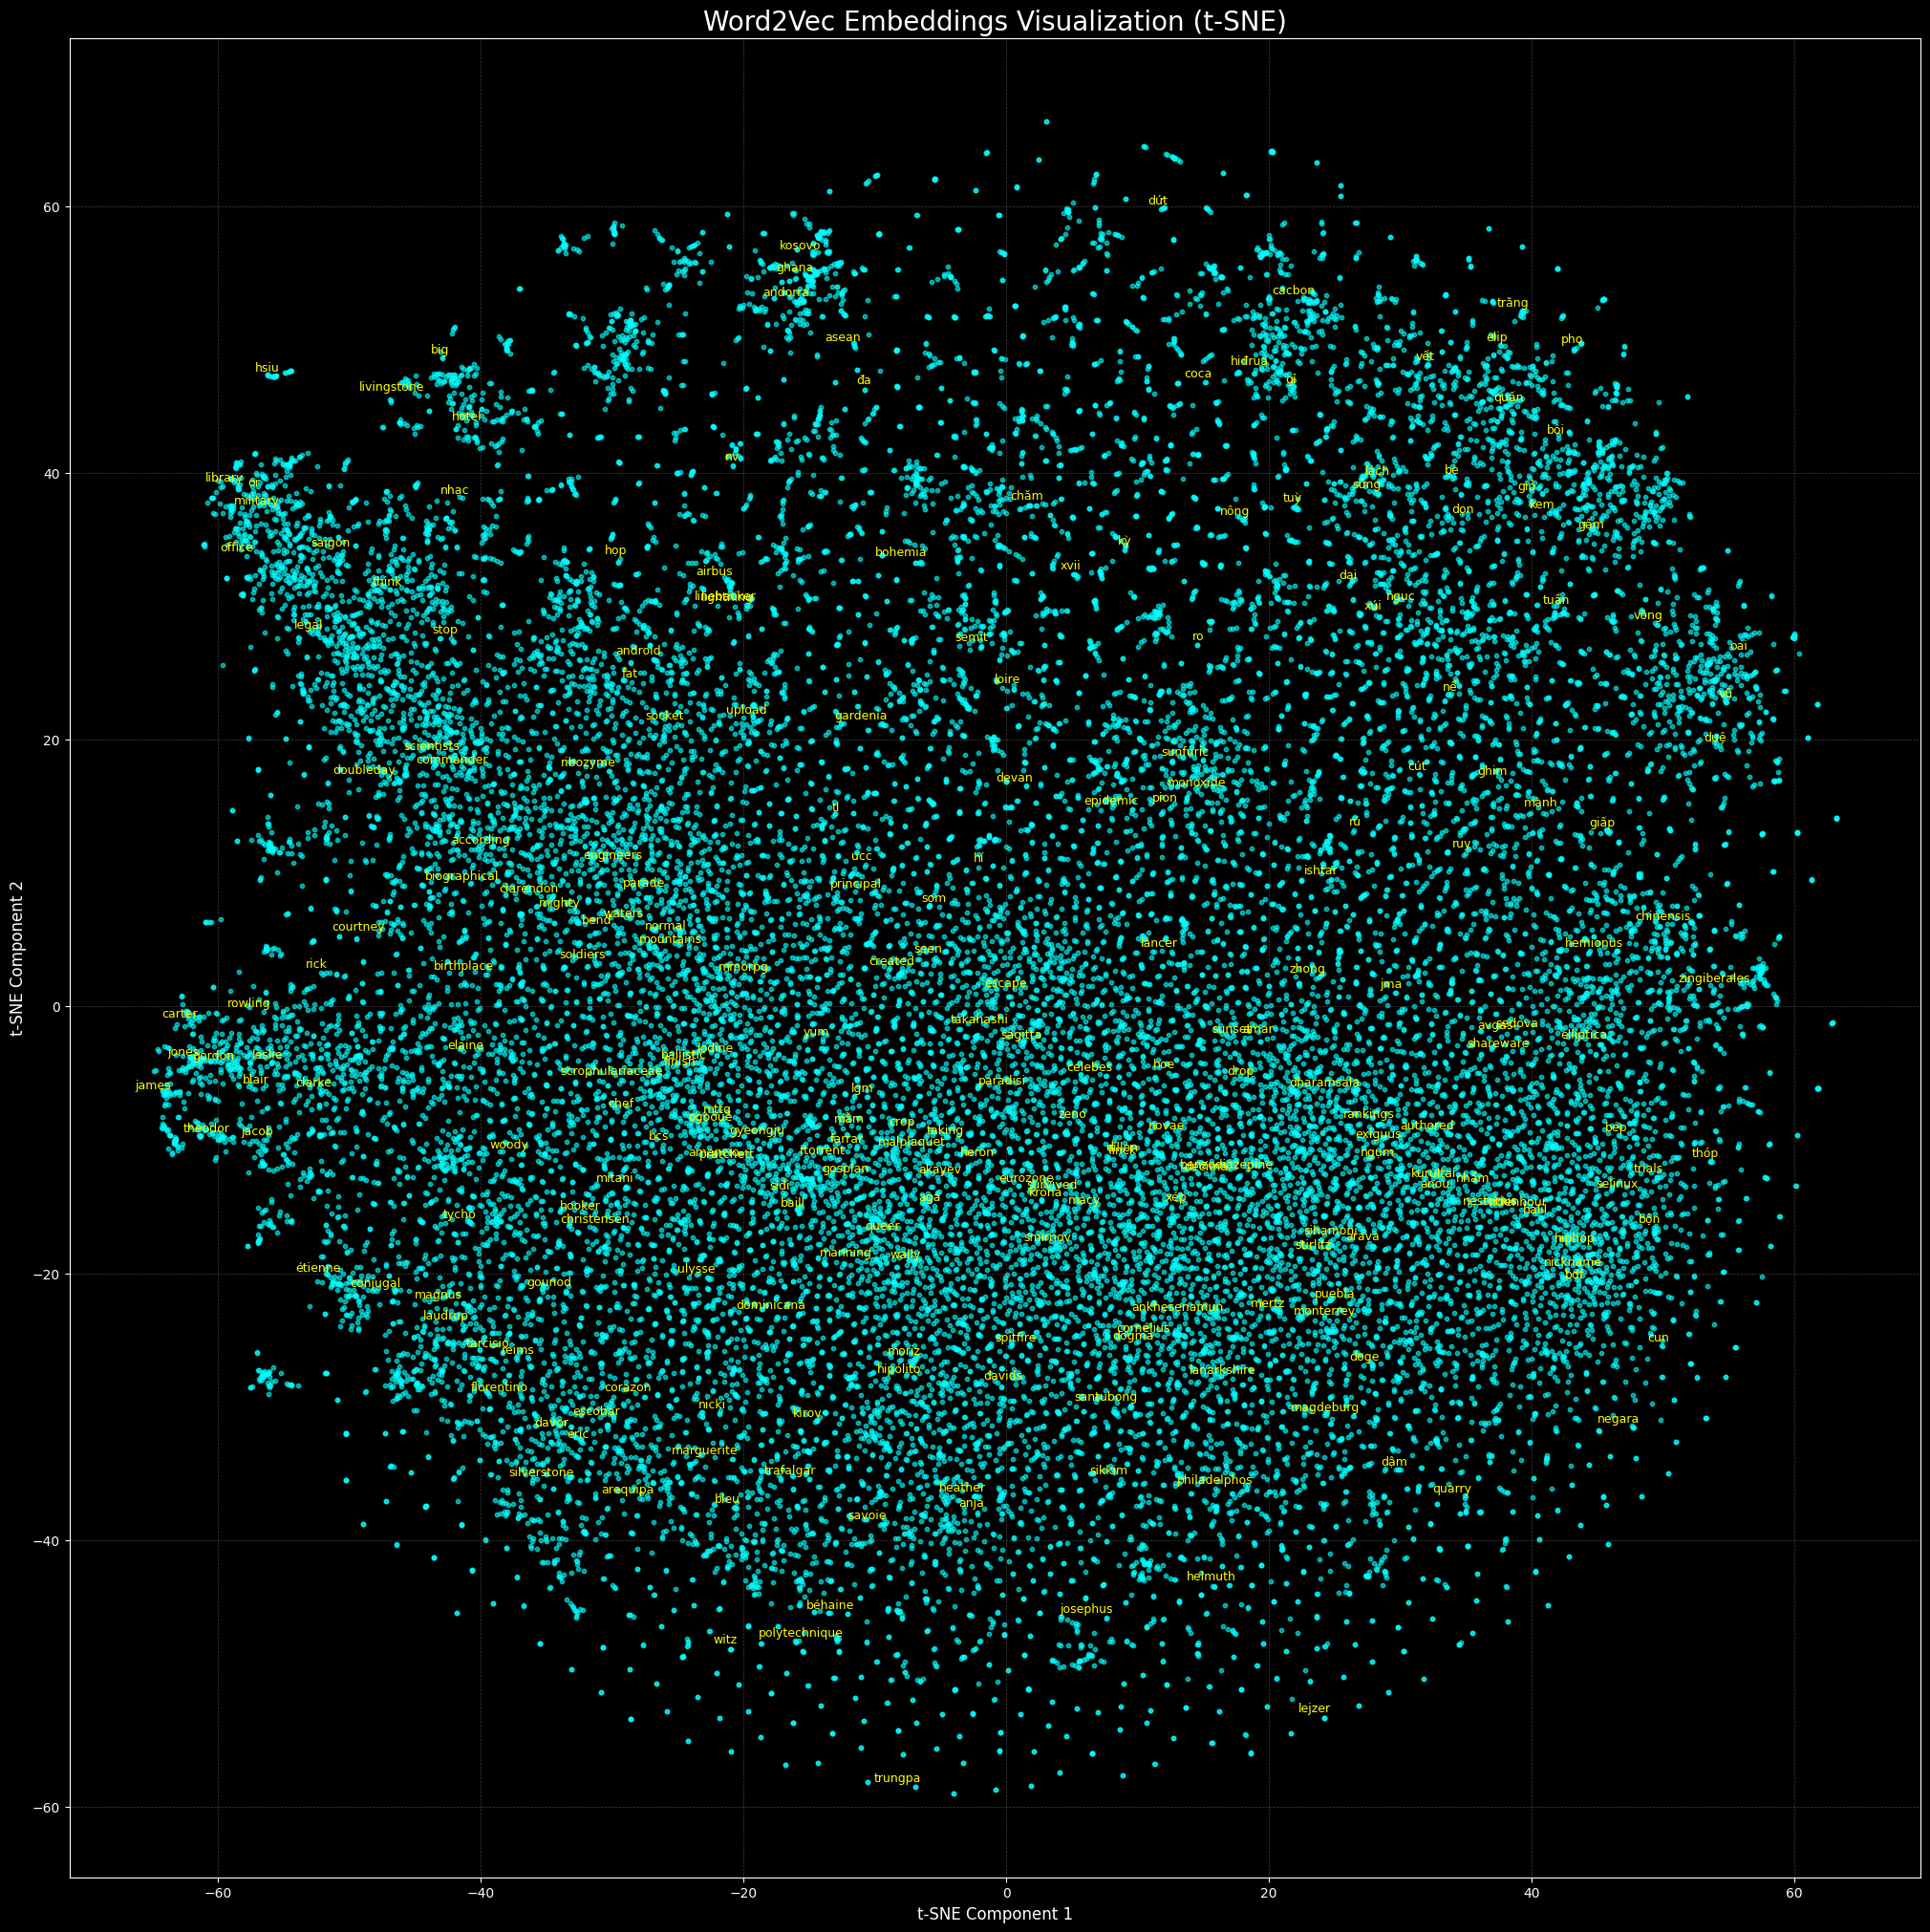

In [37]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(25, 25))
ax.scatter(Y[:, 0], Y[:, 1], alpha=0.6, color='cyan', s=10)

num_words_to_plot = 250
np.random.seed(42)
indices_to_plot = np.random.choice(len(vocab), num_words_to_plot, replace=False)

for i in indices_to_plot:
    ax.annotate(
        vocab[i],
        xy=(Y[i, 0], Y[i, 1]),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom',
        fontsize=9,
        color='yellow'
    )

ax.set_title('Word2Vec Embeddings Visualization (t-SNE)', fontsize=20, color='white')
ax.set_xlabel('t-SNE Component 1', fontsize=12, color='white')
ax.set_ylabel('t-SNE Component 2', fontsize=12, color='white')
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()


## 5. In ra các từ giống với từ cho trước

In [39]:
word = "em"
try:
    similar_words = model.wv.most_similar(word, topn=5)
    print(f"\nWords most similar to {word}:")
    for word, score in similar_words:
        print(f"{word}: {score:.4f}")
except KeyError:
    print(f"\nWord '{word}' not in vocabulary. Try another word.")


Words most similar to em:
chị: 0.6527
đứa: 0.6421
côi: 0.6389
chàng: 0.6215
dì: 0.6086
